## Laboratorio 1 
Gabriel García             
- 21352


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [68]:
# Cargar el archivo CSV, ignorando la primera fila y utilizando la segunda fila como nombres de las columnas
df = pd.read_csv('risk_factors_cervical_cancer.csv', header=0)
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


## Eda

In [69]:
print("La data tiene: ", df.shape[0], " filas y ", df.shape[1], " columnas")

La data tiene:  858  filas y  36  columnas


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [71]:
# Renombramos las columnas
# En una lista guardamos el nombre de todas las columnas
col_names = ['Age', 'Number_of_sexual_partners', 'First_sexual_intercourse', 'Num_of_pregnancies', 'Smokes', 'Smokes(years)', 'Smokes(packs/year)', 
            'Hormonal_Contraceptives', 'Hormonal_Contraceptives(years)', 'IUD', 'IUD(years)', 'STDs', 'STDs(number)', 'STDs:condylomatosis',
            'STD:cervical_condylomatosis', 'STDs:vaginal_condylomatosis', 'STDs:vulvo-perineal_condylomatosis', 'STDs:syphilis', 'STDs:pelvic_inflammatory_disease', 'STDs:genital_herpes',
            'STDs:molluscum_contagiosum', 'STDs:AIDS', 'STDs:HIV' ,'STDs:Hepatitis_B', 'STDs:HPV', 'STDs:_Number_of_diagnosis', 'STDs:_Time_since_first_diagnosis', 
            'STDs:_Time_since_last_diagnosis', 'Dx:Cancer', 'Dx:CIN',' Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']

# Luego lo podemos asignar al atributo del DataFrame 'columns'
df.columns = col_names


df.columns

Index(['Age', 'Number_of_sexual_partners', 'First_sexual_intercourse',
       'Num_of_pregnancies', 'Smokes', 'Smokes(years)', 'Smokes(packs/year)',
       'Hormonal_Contraceptives', 'Hormonal_Contraceptives(years)', 'IUD',
       'IUD(years)', 'STDs', 'STDs(number)', 'STDs:condylomatosis',
       'STD:cervical_condylomatosis', 'STDs:vaginal_condylomatosis',
       'STDs:vulvo-perineal_condylomatosis', 'STDs:syphilis',
       'STDs:pelvic_inflammatory_disease', 'STDs:genital_herpes',
       'STDs:molluscum_contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis_B', 'STDs:HPV', 'STDs:_Number_of_diagnosis',
       'STDs:_Time_since_first_diagnosis', 'STDs:_Time_since_last_diagnosis',
       'Dx:Cancer', 'Dx:CIN', ' Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [72]:
categoricas = []

for columna in df.columns:
    if df[columna].dtype=='O':
        categoricas.append(columna)
        
print("Hay ", len(categoricas), " variables.")


print("Las variables categoricas son: ")
print("*"*100)
for var in categoricas:
    print(var)


Hay  26  variables.
Las variables categoricas son: 
****************************************************************************************************
Number_of_sexual_partners
First_sexual_intercourse
Num_of_pregnancies
Smokes
Smokes(years)
Smokes(packs/year)
Hormonal_Contraceptives
Hormonal_Contraceptives(years)
IUD
IUD(years)
STDs
STDs(number)
STDs:condylomatosis
STD:cervical_condylomatosis
STDs:vaginal_condylomatosis
STDs:vulvo-perineal_condylomatosis
STDs:syphilis
STDs:pelvic_inflammatory_disease
STDs:genital_herpes
STDs:molluscum_contagiosum
STDs:AIDS
STDs:HIV
STDs:Hepatitis_B
STDs:HPV
STDs:_Time_since_first_diagnosis
STDs:_Time_since_last_diagnosis


In [73]:
# Registros de las categoricas:
df[categoricas].head()

,Number_of_sexual_partners,First_sexual_intercourse,Num_of_pregnancies,Smokes,Smokes(years),Smokes(packs/year),Hormonal_Contraceptives,Hormonal_Contraceptives(years),IUD,IUD(years),...,STDs:syphilis,STDs:pelvic_inflammatory_disease,STDs:genital_herpes,STDs:molluscum_contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis_B,STDs:HPV,STDs:_Time_since_first_diagnosis,STDs:_Time_since_last_diagnosis
0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
1,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
2,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
3,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
4,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?


In [74]:
# Verificamos Nulos
df[categoricas].isnull().sum()


Number_of_sexual_partners             0
First_sexual_intercourse              0
Num_of_pregnancies                    0
Smokes                                0
Smokes(years)                         0
Smokes(packs/year)                    0
Hormonal_Contraceptives               0
Hormonal_Contraceptives(years)        0
IUD                                   0
IUD(years)                            0
STDs                                  0
STDs(number)                          0
STDs:condylomatosis                   0
STD:cervical_condylomatosis           0
STDs:vaginal_condylomatosis           0
STDs:vulvo-perineal_condylomatosis    0
STDs:syphilis                         0
STDs:pelvic_inflammatory_disease      0
STDs:genital_herpes                   0
STDs:molluscum_contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis_B                      0
STDs:HPV                              0
STDs:_Time_since_first_diagnosis      0


In [75]:
#Vemos la frecuencia de los valores

for var in categoricas:
    print(df[var].value_counts())
    print("*"* 35)


2.0     272
3.0     208
1.0     206
4.0      78
5.0      44
?        26
6.0       9
7.0       7
8.0       4
15.0      1
10.0      1
28.0      1
9.0       1
Name: Number_of_sexual_partners, dtype: int64
***********************************
15.0    163
17.0    151
18.0    137
16.0    121
14.0     79
19.0     60
20.0     37
13.0     25
21.0     20
23.0      9
22.0      9
?         7
26.0      7
12.0      6
27.0      6
24.0      6
29.0      5
28.0      3
11.0      2
25.0      2
10.0      2
32.0      1
Name: First_sexual_intercourse, dtype: int64
***********************************
1.0     270
2.0     240
3.0     139
4.0      74
?        56
5.0      35
6.0      18
0.0      16
7.0       6
8.0       2
11.0      1
10.0      1
Name: Num_of_pregnancies, dtype: int64
***********************************
0.0    722
1.0    123
?       13
Name: Smokes, dtype: int64
***********************************
0.0            722
1.266972909     15
?               13
5.0              9
9.0              9
1.0    

In [76]:
# Vemos la frecuencia de los valores en porcentajes

for var in categoricas:
    print(df[var].value_counts() / float(len(df)))
    print('*' * 50)

2.0     0.317016
3.0     0.242424
1.0     0.240093
4.0     0.090909
5.0     0.051282
?       0.030303
6.0     0.010490
7.0     0.008159
8.0     0.004662
15.0    0.001166
10.0    0.001166
28.0    0.001166
9.0     0.001166
Name: Number_of_sexual_partners, dtype: float64
**************************************************
15.0    0.189977
17.0    0.175991
18.0    0.159674
16.0    0.141026
14.0    0.092075
19.0    0.069930
20.0    0.043124
13.0    0.029138
21.0    0.023310
23.0    0.010490
22.0    0.010490
?       0.008159
26.0    0.008159
12.0    0.006993
27.0    0.006993
24.0    0.006993
29.0    0.005828
28.0    0.003497
11.0    0.002331
25.0    0.002331
10.0    0.002331
32.0    0.001166
Name: First_sexual_intercourse, dtype: float64
**************************************************
1.0     0.314685
2.0     0.279720
3.0     0.162005
4.0     0.086247
?       0.065268
5.0     0.040793
6.0     0.020979
0.0     0.018648
7.0     0.006993
8.0     0.002331
11.0    0.001166
10.0    0.001166
Name

In [77]:
# First sexual intercourse
df.First_sexual_intercourse.unique()

array(['15.0', '14.0', '?', '16.0', '21.0', '23.0', '17.0', '26.0',
       '20.0', '25.0', '18.0', '27.0', '19.0', '24.0', '32.0', '13.0',
       '29.0', '11.0', '12.0', '22.0', '28.0', '10.0'], dtype=object)

In [78]:
for col in ['Number_of_sexual_partners', 'First_sexual_intercourse', 'Num_of_pregnancies', 'Smokes', 'Smokes(years)', 'Smokes(packs/year)',
        'Hormonal_Contraceptives', 'Hormonal_Contraceptives(years)', 'IUD', 'IUD(years)', 'STDs', 'STDs(number)', 'STDs:condylomatosis',
        'STD:cervical_condylomatosis', 'STDs:vaginal_condylomatosis', 'STDs:vulvo-perineal_condylomatosis', 'STDs:syphilis', 'STDs:pelvic_inflammatory_disease',
        'STDs:genital_herpes', 'STDs:molluscum_contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis_B', 'STDs:HPV', 'STDs:_Time_since_first_diagnosis',
        'STDs:_Time_since_last_diagnosis']:
    print("*"*50)
    print("Antes de sustitucion", col)
    print(df[col].value_counts())
    print("*"*50)
    df[col] = df[col].str.strip() #Esto nos asegura que no hayan espacios al final y al principio.
    df[col].replace('?', np.NaN, inplace=True)
    print("Despues de sustitucion")
    print(df[col].value_counts())

**************************************************
Antes de sustitucion Number_of_sexual_partners
2.0     272
3.0     208
1.0     206
4.0      78
5.0      44
?        26
6.0       9
7.0       7
8.0       4
15.0      1
10.0      1
28.0      1
9.0       1
Name: Number_of_sexual_partners, dtype: int64
**************************************************
Despues de sustitucion
2.0     272
3.0     208
1.0     206
4.0      78
5.0      44
6.0       9
7.0       7
8.0       4
15.0      1
10.0      1
28.0      1
9.0       1
Name: Number_of_sexual_partners, dtype: int64
**************************************************
Antes de sustitucion First_sexual_intercourse
15.0    163
17.0    151
18.0    137
16.0    121
14.0     79
19.0     60
20.0     37
13.0     25
21.0     20
23.0      9
22.0      9
?         7
26.0      7
12.0      6
27.0      6
24.0      6
29.0      5
28.0      3
11.0      2
25.0      2
10.0      2
32.0      1
Name: First_sexual_intercourse, dtype: int64
******************************

0.0             722
0.5132021277     18
1.0               6
3.0               5
2.0               4
               ... 
7.5               1
37.0              1
2.25              1
0.003             1
0.3               1
Name: Smokes(packs/year), Length: 62, dtype: int64
**************************************************
Antes de sustitucion Hormonal_Contraceptives
1.0    481
0.0    269
?      108
Name: Hormonal_Contraceptives, dtype: int64
**************************************************
Despues de sustitucion
1.0    481
0.0    269
Name: Hormonal_Contraceptives, dtype: int64
**************************************************
Antes de sustitucion Hormonal_Contraceptives(years)
0.0            269
?              108
1.0             77
0.25            41
2.0             40
3.0             39
5.0             34
0.08            25
0.5             25
6.0             24
4.0             22
7.0             21
8.0             18
0.16            16
9.0             12
10.0            11
0.33     

In [79]:
df[categoricas].isnull().sum()

Number_of_sexual_partners              26
First_sexual_intercourse                7
Num_of_pregnancies                     56
Smokes                                 13
Smokes(years)                          13
Smokes(packs/year)                     13
Hormonal_Contraceptives               108
Hormonal_Contraceptives(years)        108
IUD                                   117
IUD(years)                            117
STDs                                  105
STDs(number)                          105
STDs:condylomatosis                   105
STD:cervical_condylomatosis           105
STDs:vaginal_condylomatosis           105
STDs:vulvo-perineal_condylomatosis    105
STDs:syphilis                         105
STDs:pelvic_inflammatory_disease      105
STDs:genital_herpes                   105
STDs:molluscum_contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis_B                      105
STDs:HPV                          

## 2 Tipo de cada variable

In [80]:
# Determinar el tipo de cada variable (cualitativa o categórica, cuantitativa continua, cuantitativa discreta)
var_types = {}
for col in df.columns:
    if df[col].dtype == 'O':
        var_types[col] = 'Cualitativa/Categórica'
    elif df[col].nunique() < 10:
        var_types[col] = 'Cuantitativa Discreta'
    else:
        var_types[col] = 'Cuantitativa Continua'

print(var_types)

{'Age': 'Cuantitativa Continua', 'Number_of_sexual_partners': 'Cualitativa/Categórica', 'First_sexual_intercourse': 'Cualitativa/Categórica', 'Num_of_pregnancies': 'Cualitativa/Categórica', 'Smokes': 'Cualitativa/Categórica', 'Smokes(years)': 'Cualitativa/Categórica', 'Smokes(packs/year)': 'Cualitativa/Categórica', 'Hormonal_Contraceptives': 'Cualitativa/Categórica', 'Hormonal_Contraceptives(years)': 'Cualitativa/Categórica', 'IUD': 'Cualitativa/Categórica', 'IUD(years)': 'Cualitativa/Categórica', 'STDs': 'Cualitativa/Categórica', 'STDs(number)': 'Cualitativa/Categórica', 'STDs:condylomatosis': 'Cualitativa/Categórica', 'STD:cervical_condylomatosis': 'Cualitativa/Categórica', 'STDs:vaginal_condylomatosis': 'Cualitativa/Categórica', 'STDs:vulvo-perineal_condylomatosis': 'Cualitativa/Categórica', 'STDs:syphilis': 'Cualitativa/Categórica', 'STDs:pelvic_inflammatory_disease': 'Cualitativa/Categórica', 'STDs:genital_herpes': 'Cualitativa/Categórica', 'STDs:molluscum_contagiosum': 'Cualitati

## Graficos

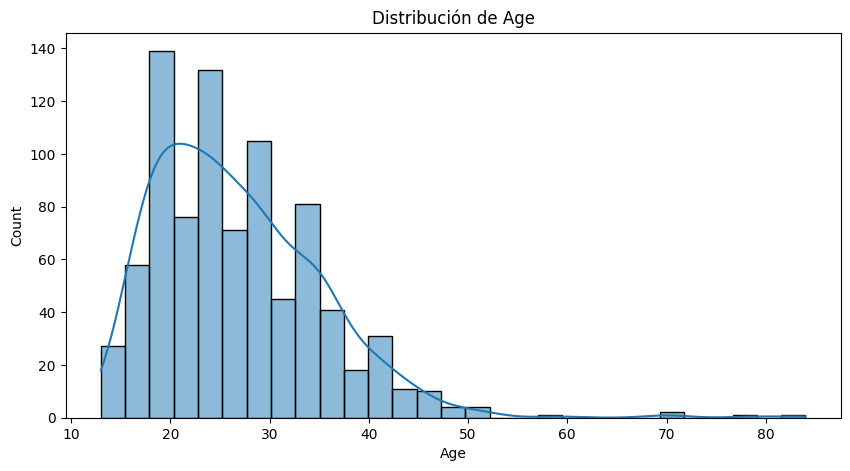

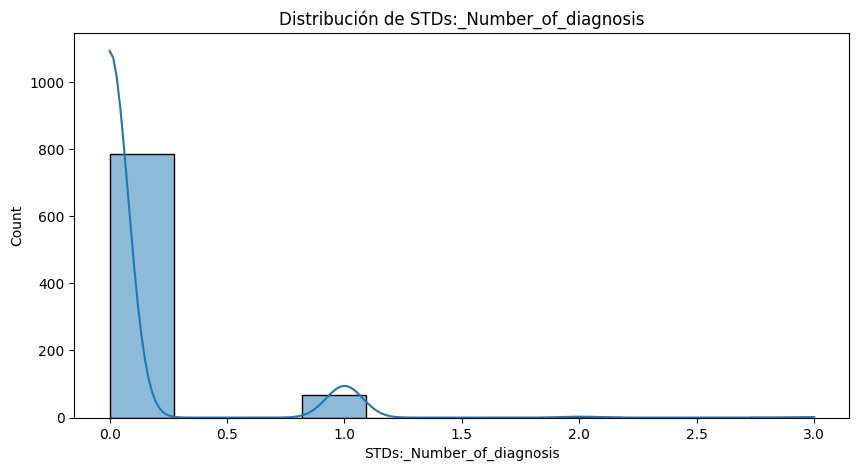

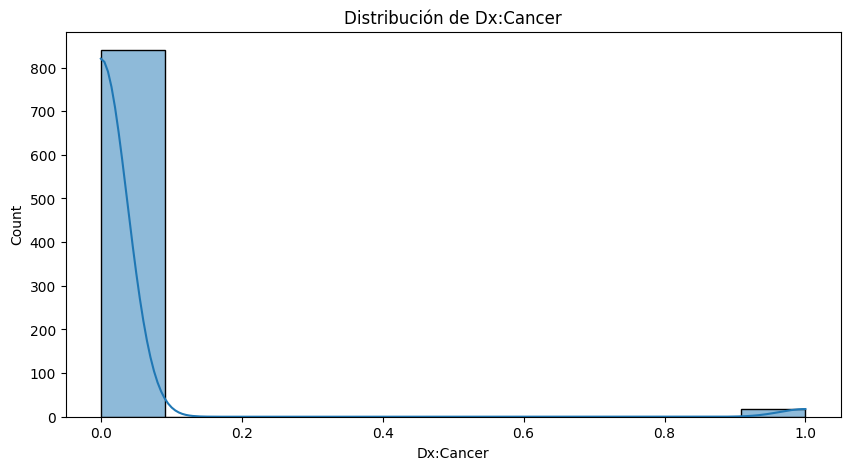

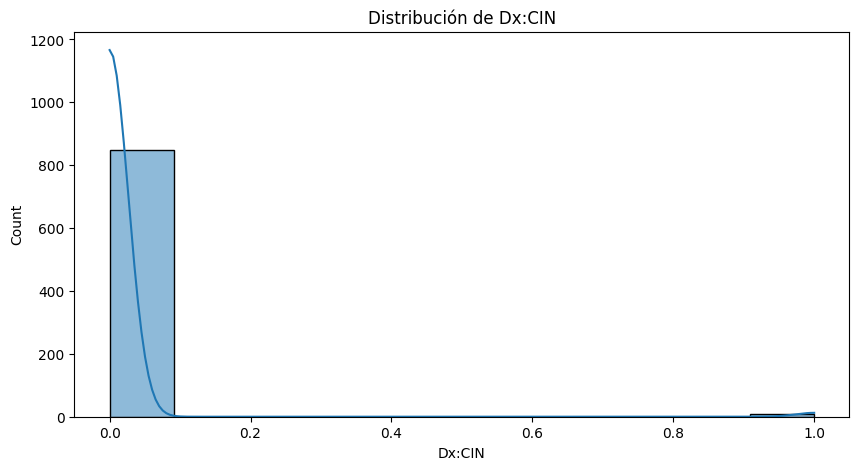

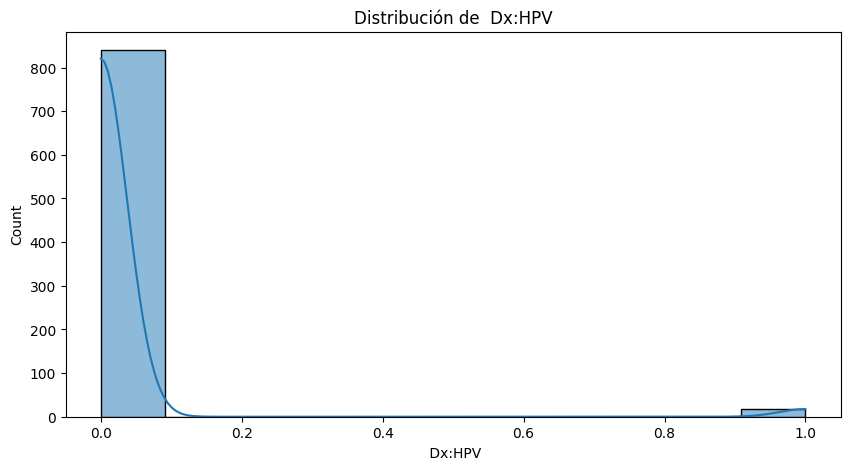

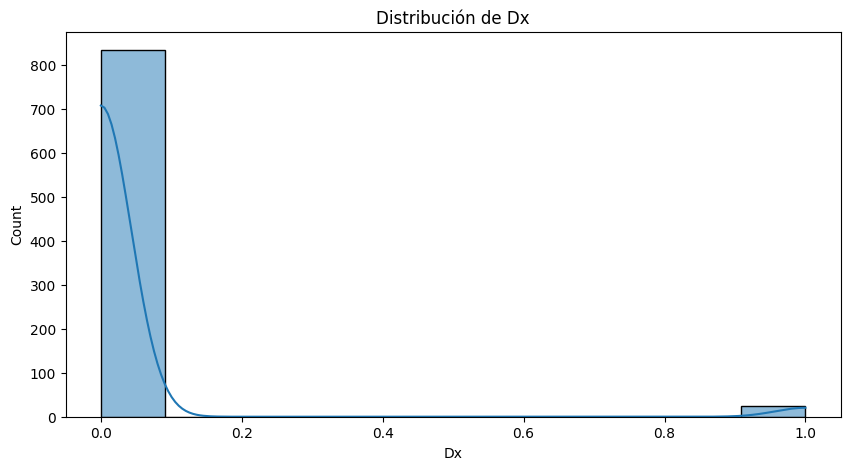

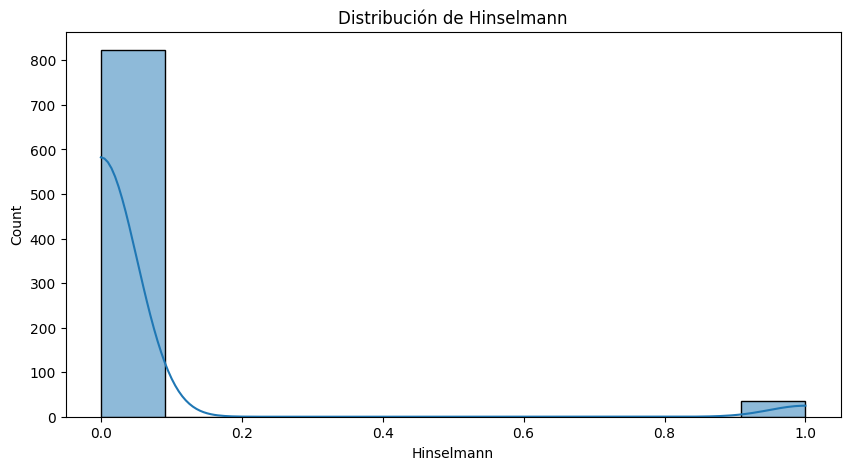

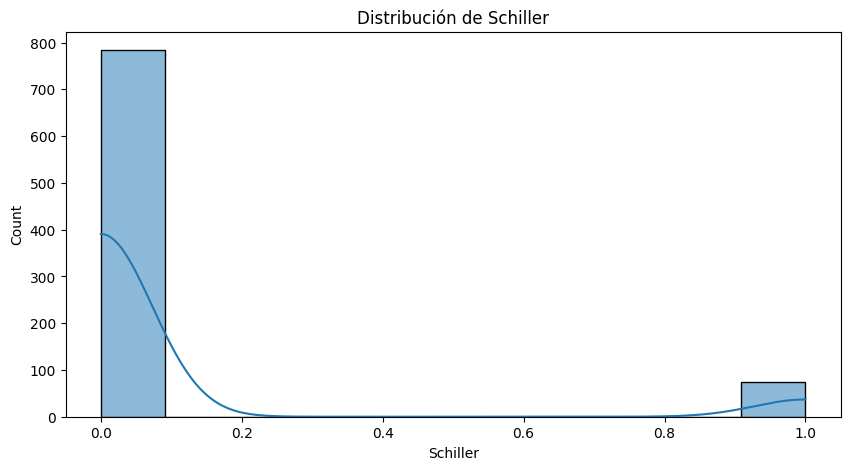

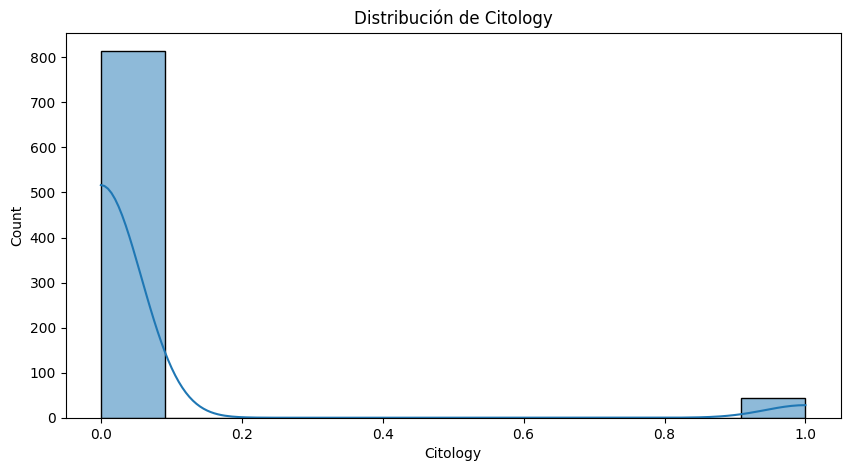

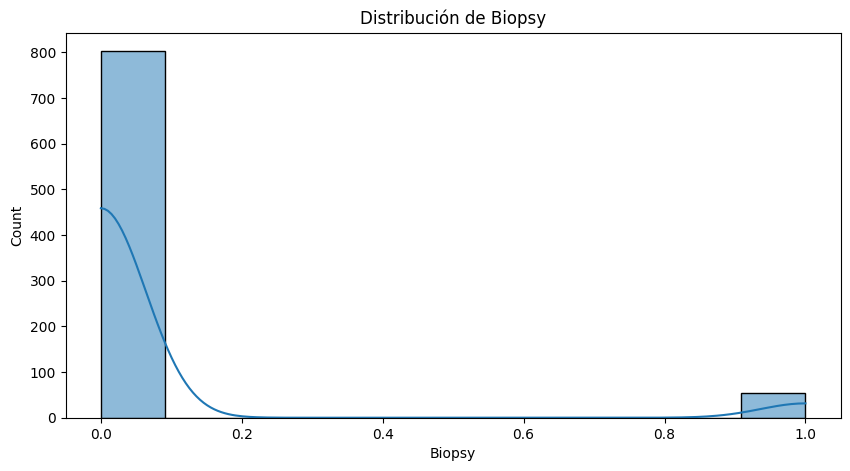

In [83]:
# Gráficos para variables cuantitativas
num_vars = [col for col, tipo in var_types.items() if 'Cuantitativa' in tipo]

for col in num_vars:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()




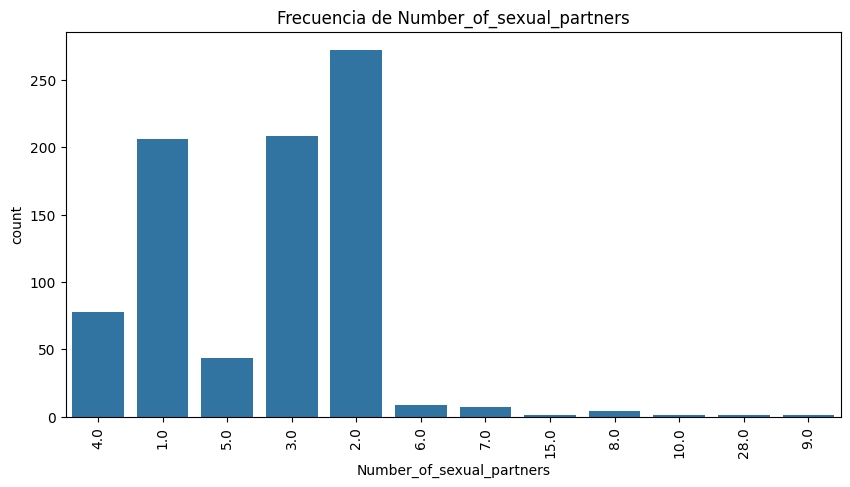

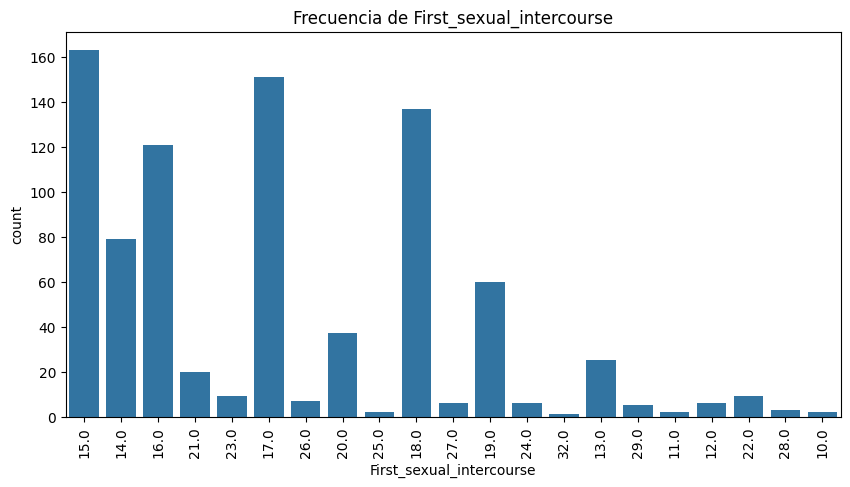

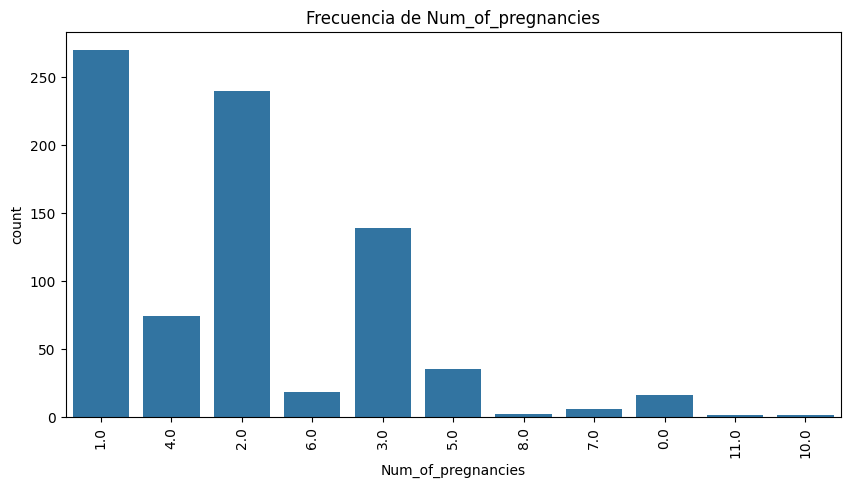

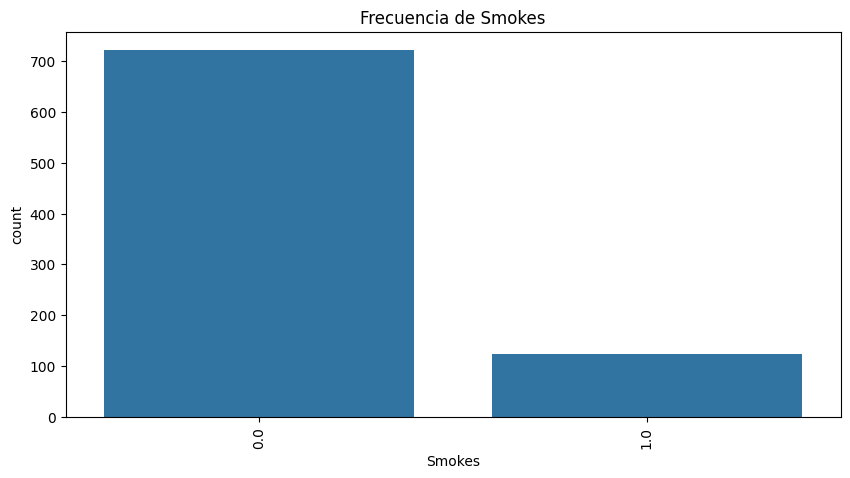

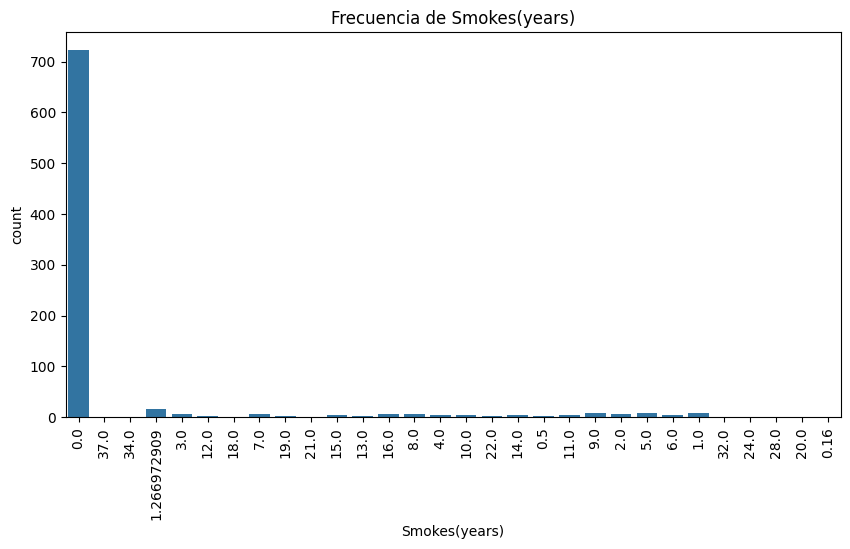

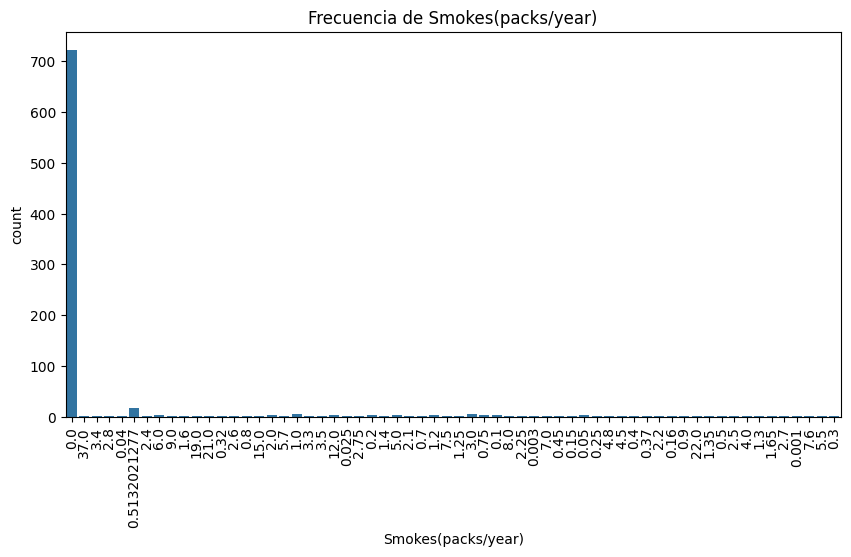

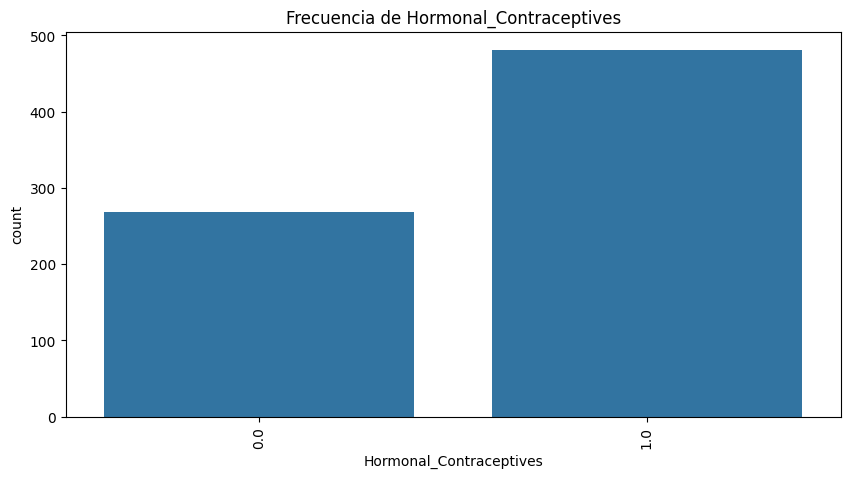

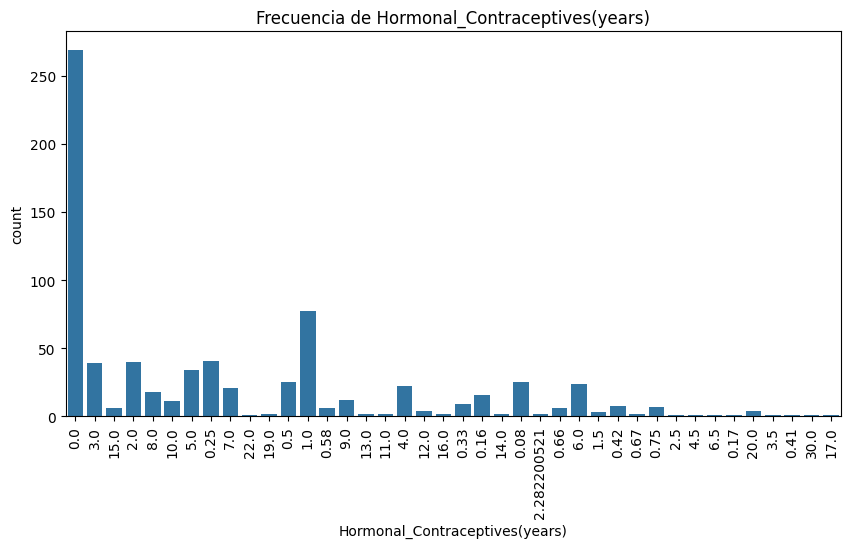

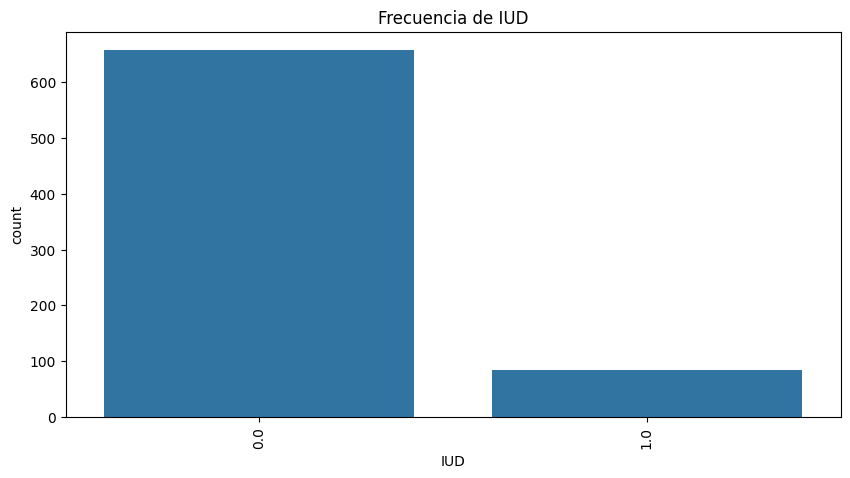

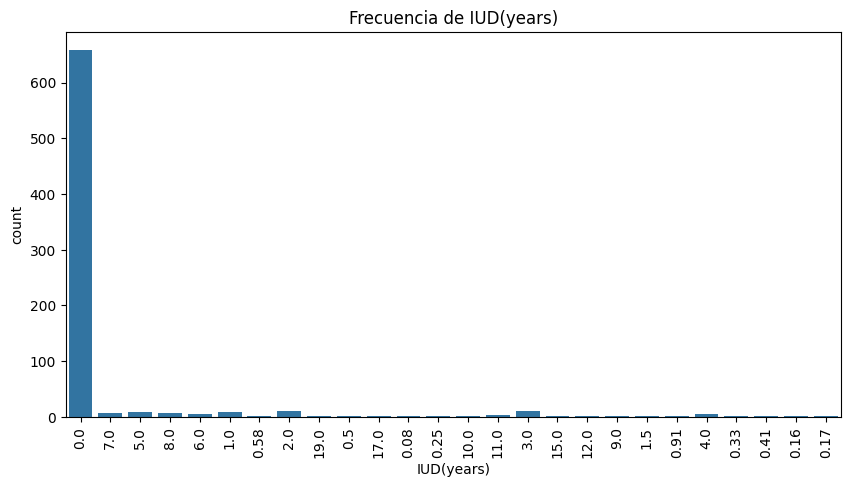

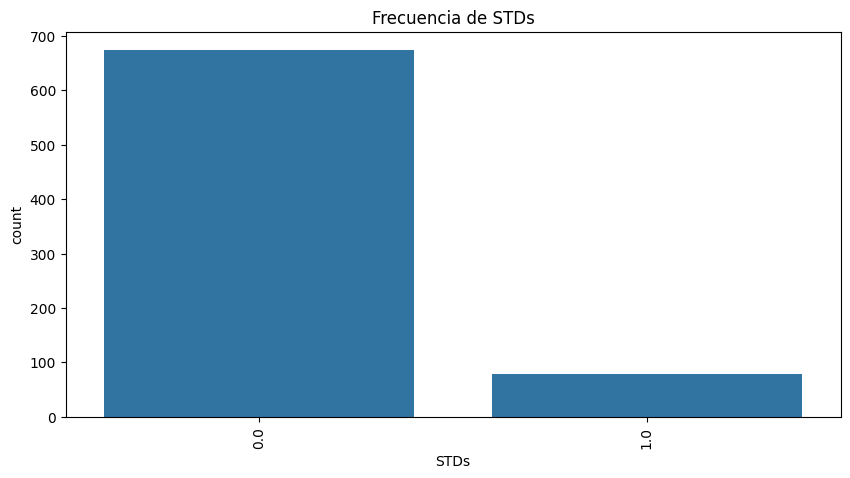

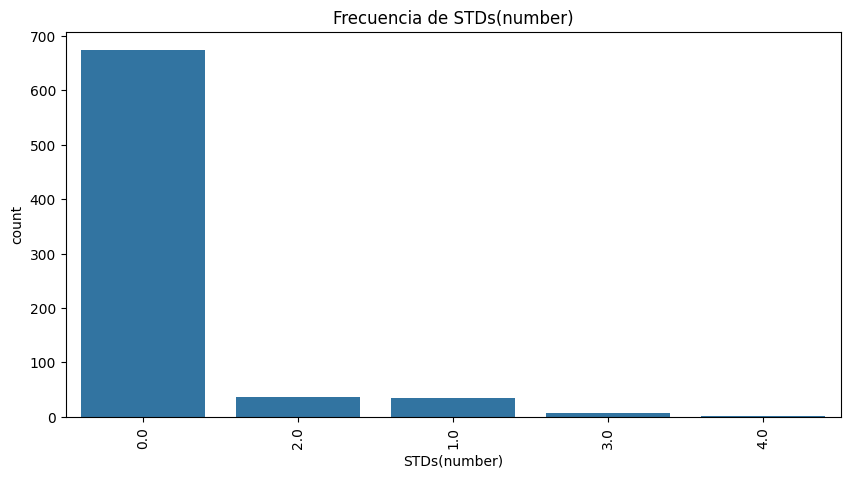

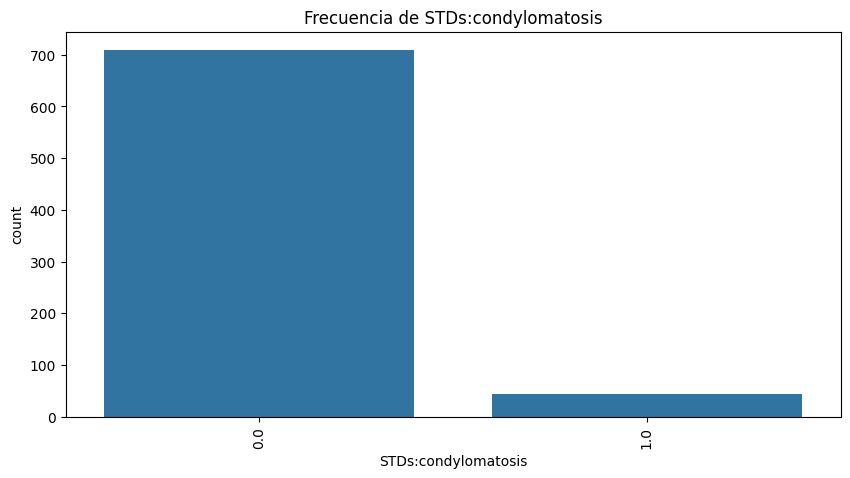

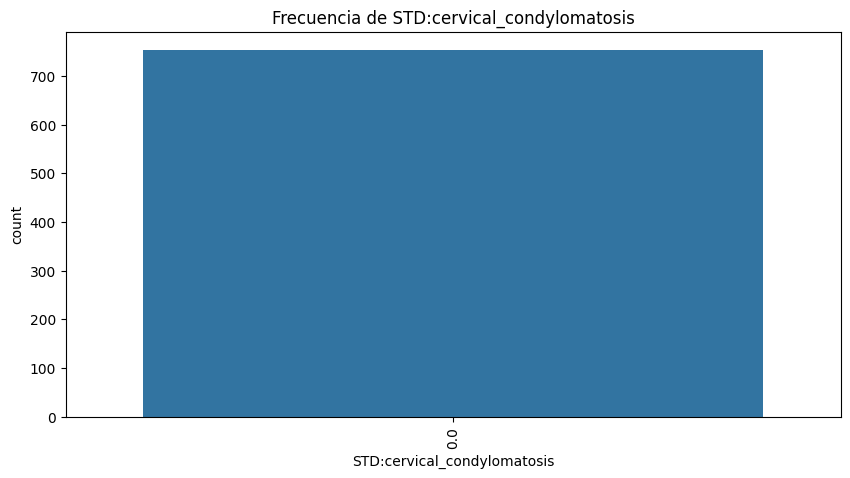

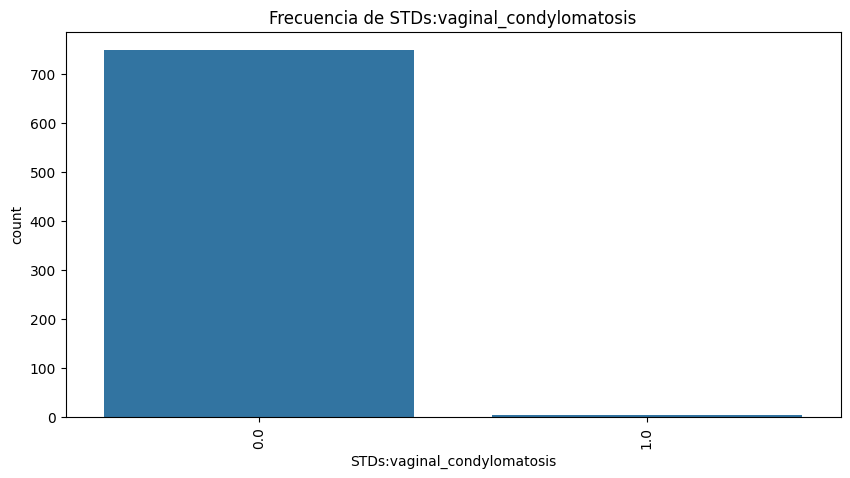

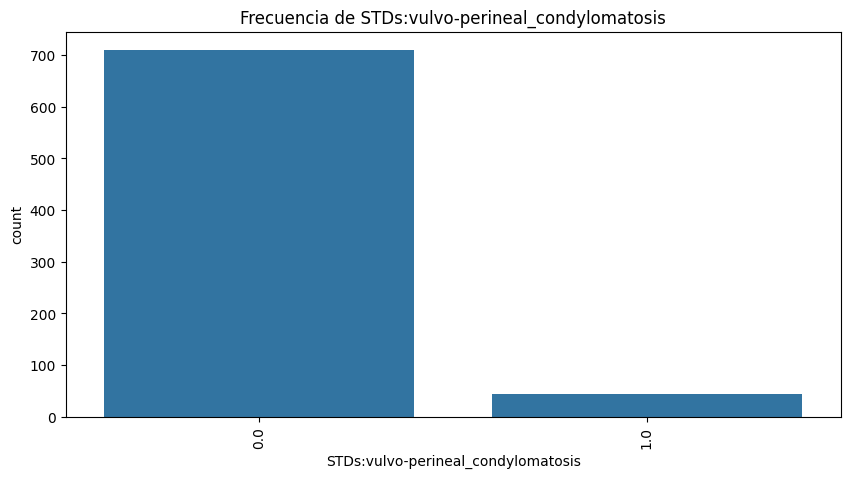

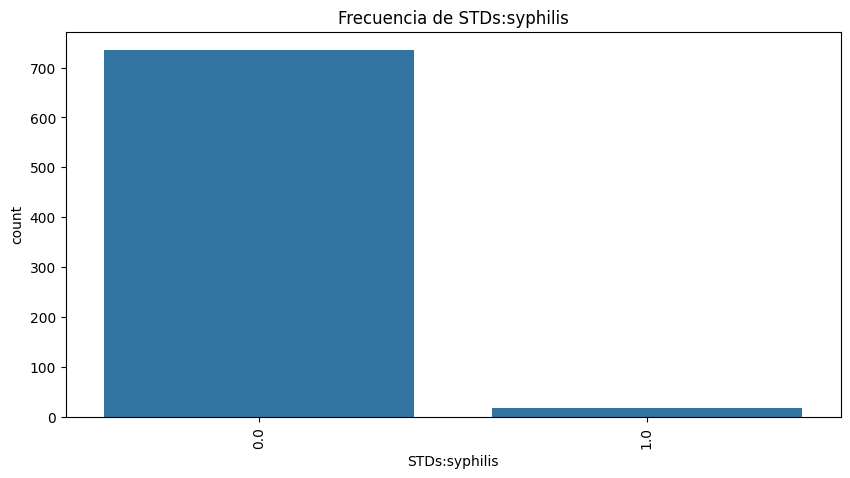

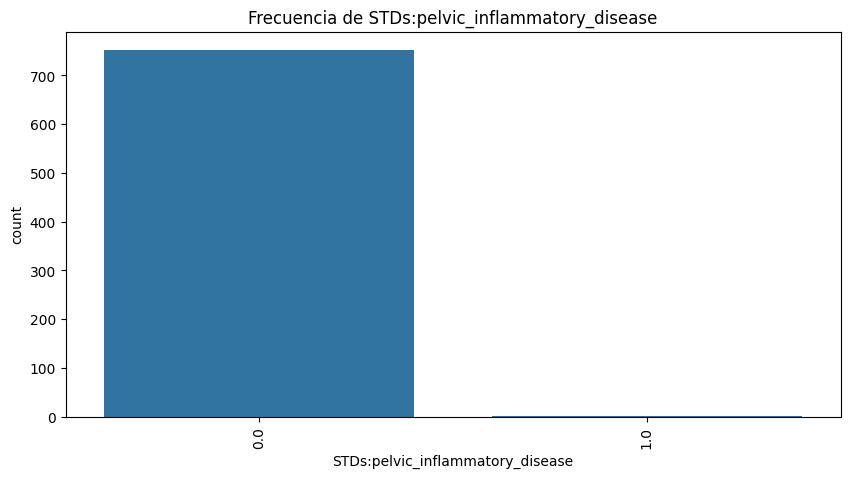

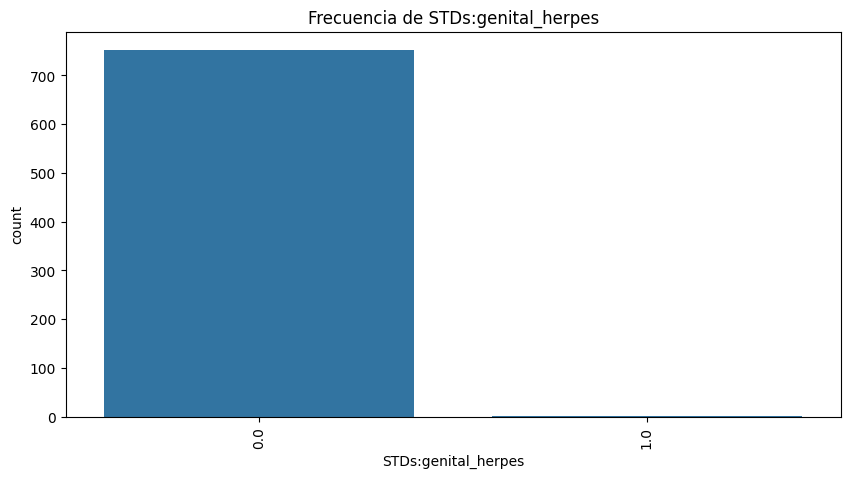

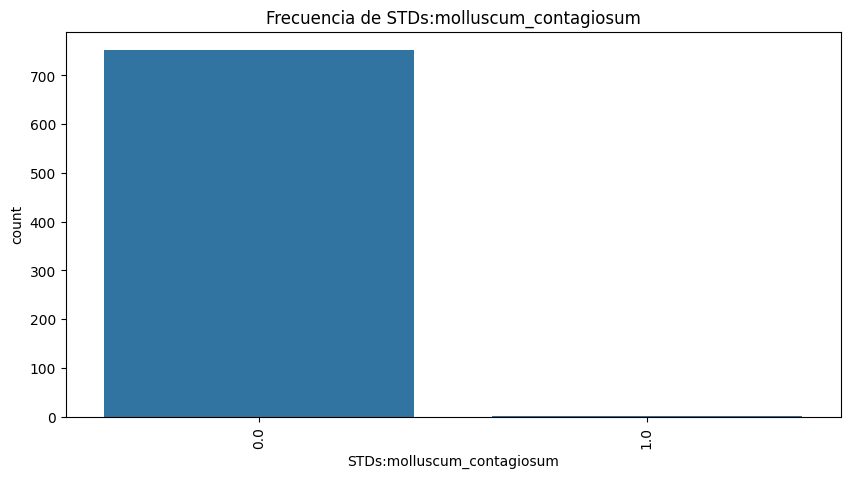

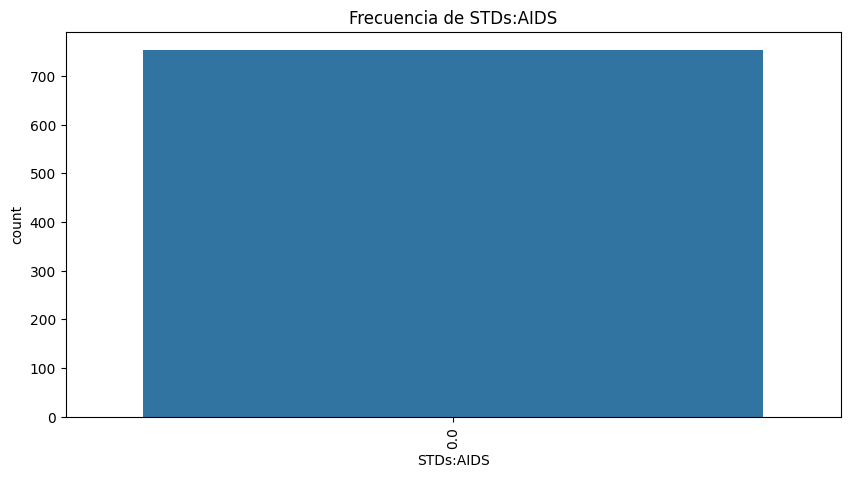

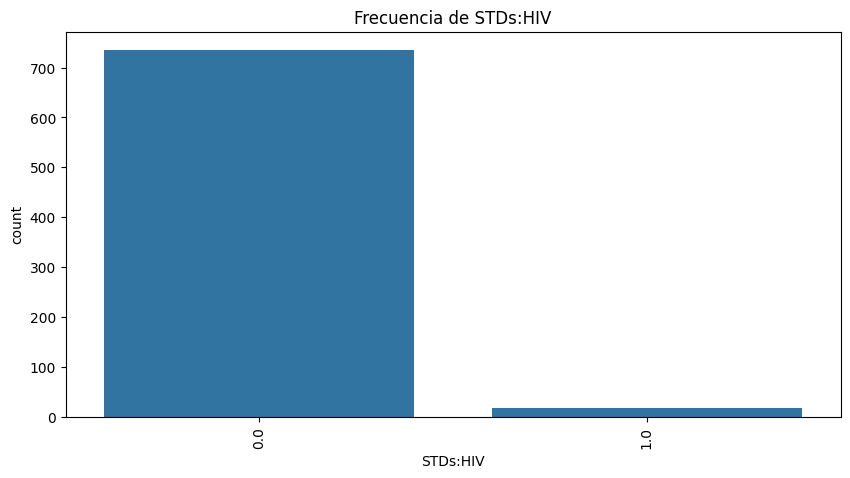

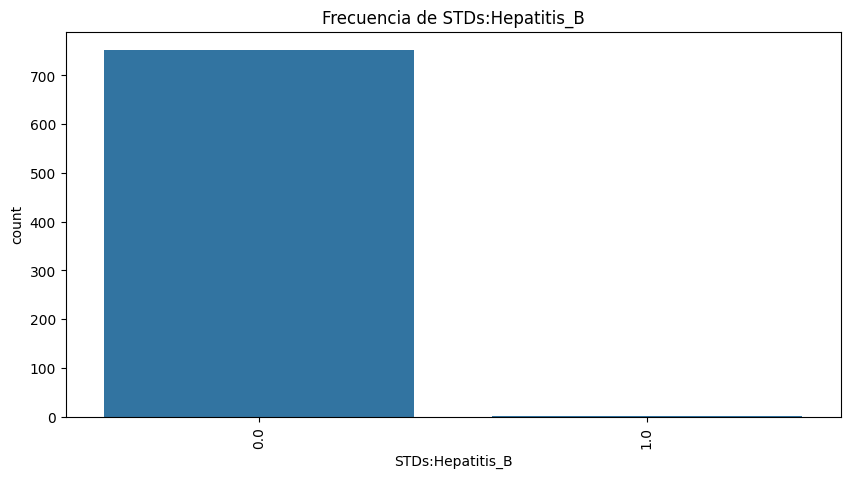

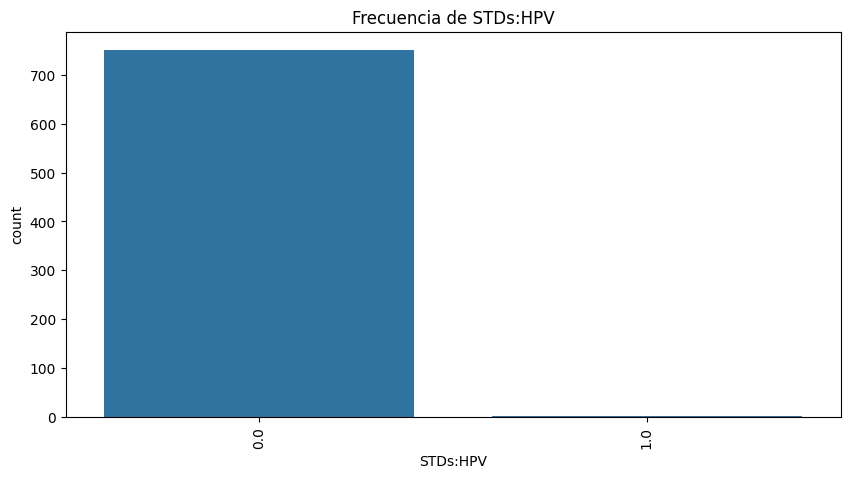

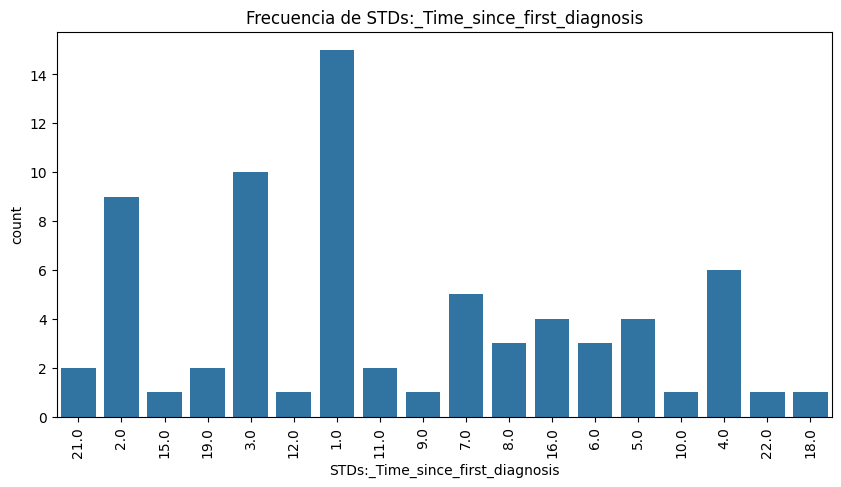

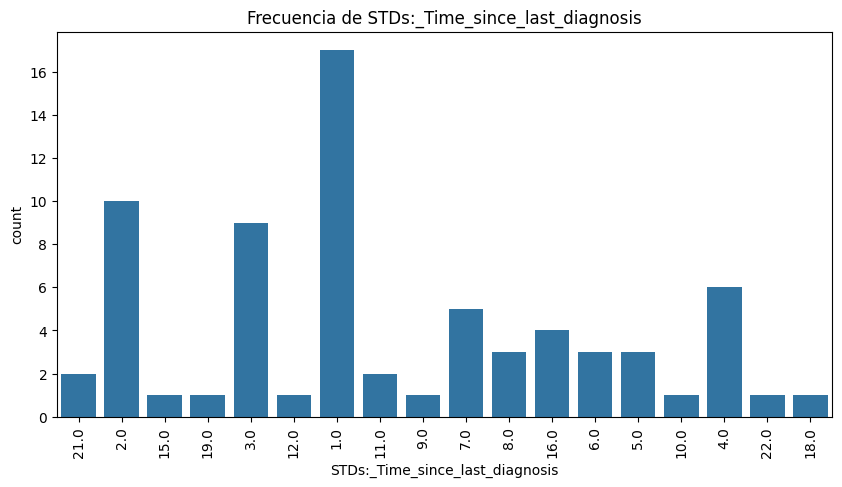

In [84]:
# Gráficos para variables categóricas
cat_vars = [col for col, tipo in var_types.items() if 'Cualitativa' in tipo]

for col in cat_vars:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df[col])
    plt.title(f'Frecuencia de {col}')
    plt.xticks(rotation=90)
    plt.show()

## 4. Analisis de correlación entre variables numéricas

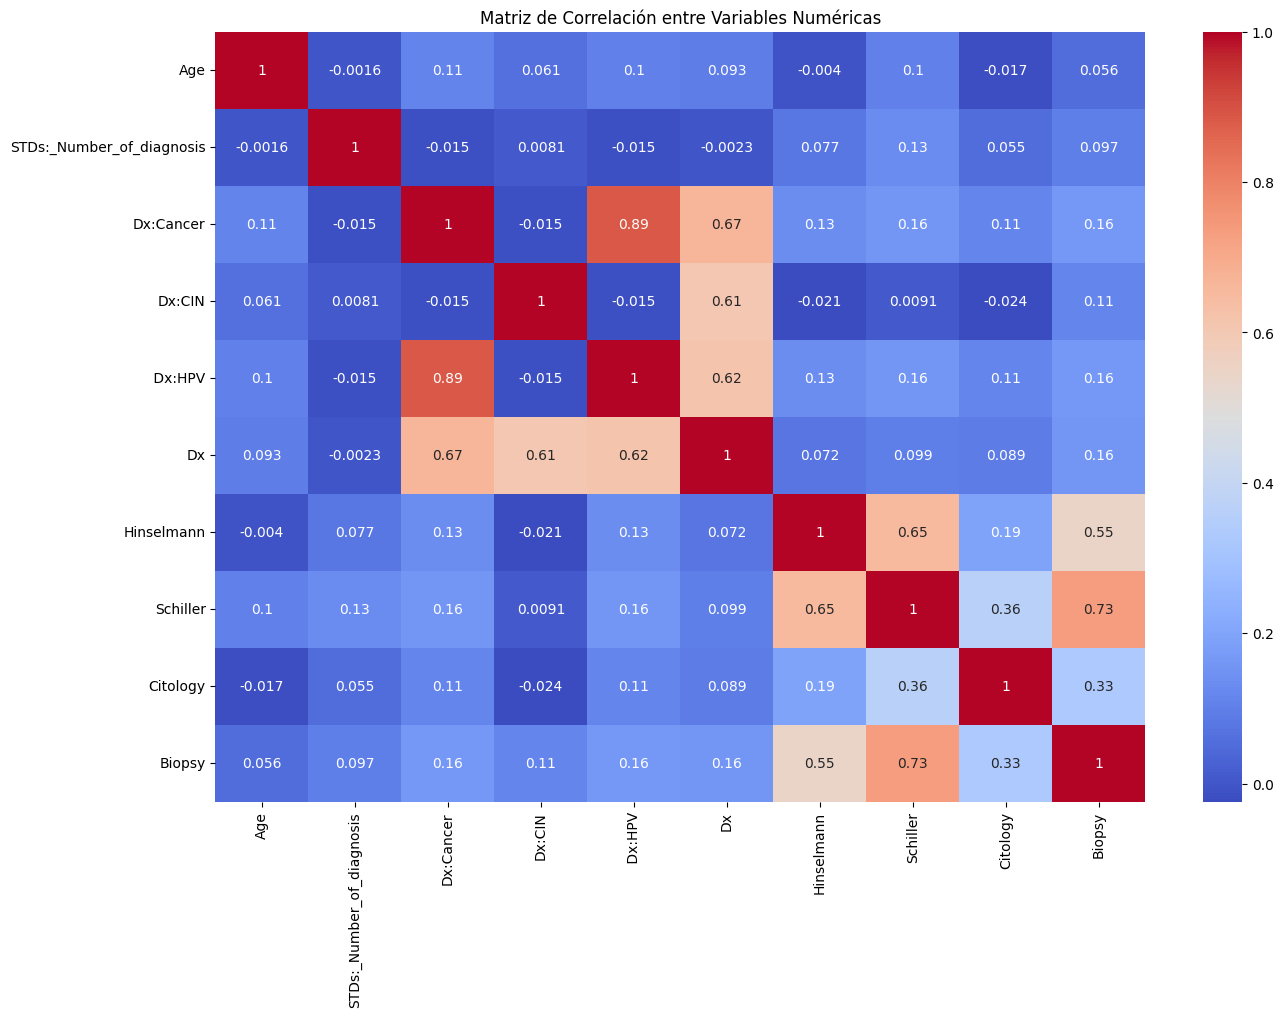

In [82]:
# Aislar variables numéricas y calcular matriz de correlación
num_df = df[num_vars].dropna()
correlation_matrix = num_df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()


## 5. Análisis de variables categóricas

Frecuencia de Number_of_sexual_partners
2.0     272
3.0     208
1.0     206
4.0      78
5.0      44
6.0       9
7.0       7
8.0       4
15.0      1
10.0      1
28.0      1
9.0       1
Name: Number_of_sexual_partners, dtype: int64
Proporción de Number_of_sexual_partners
2.0     0.317016
3.0     0.242424
1.0     0.240093
4.0     0.090909
5.0     0.051282
6.0     0.010490
7.0     0.008159
8.0     0.004662
15.0    0.001166
10.0    0.001166
28.0    0.001166
9.0     0.001166
Name: Number_of_sexual_partners, dtype: float64
**************************************************
Frecuencia de First_sexual_intercourse
15.0    163
17.0    151
18.0    137
16.0    121
14.0     79
19.0     60
20.0     37
13.0     25
21.0     20
23.0      9
22.0      9
26.0      7
12.0      6
27.0      6
24.0      6
29.0      5
28.0      3
11.0      2
25.0      2
10.0      2
32.0      1
Name: First_sexual_intercourse, dtype: int64
Proporción de First_sexual_intercourse
15.0    0.189977
17.0    0.175991
18.0    0.159674
1

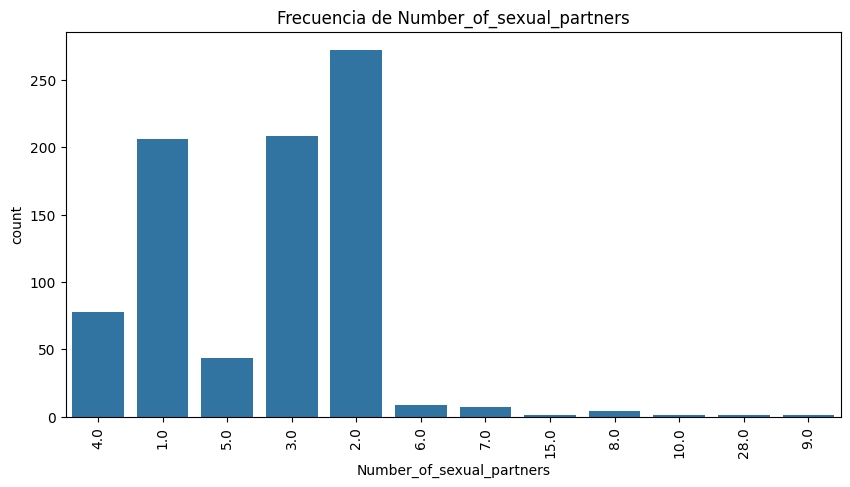

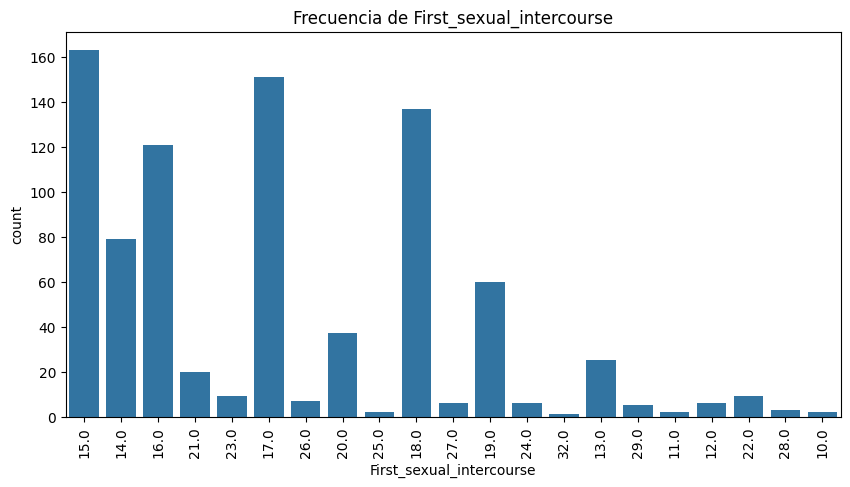

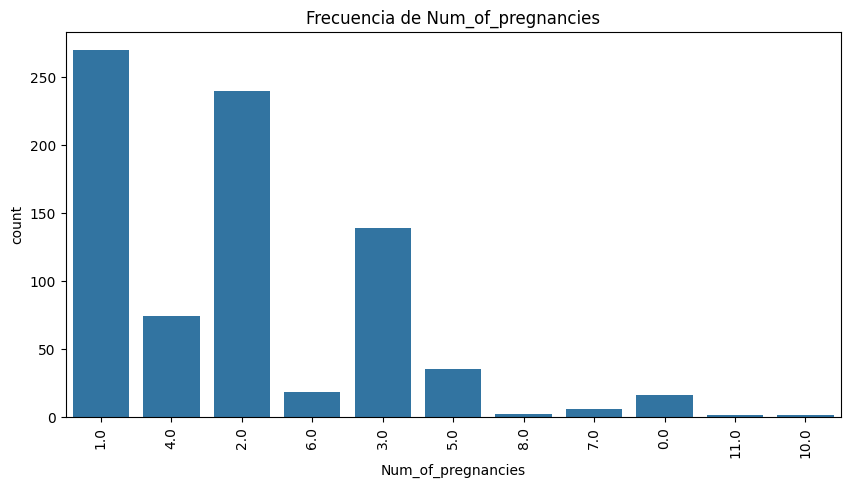

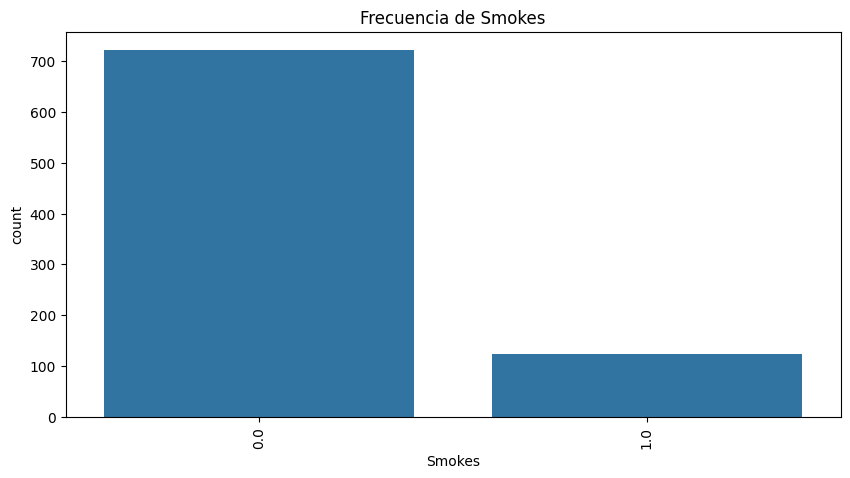

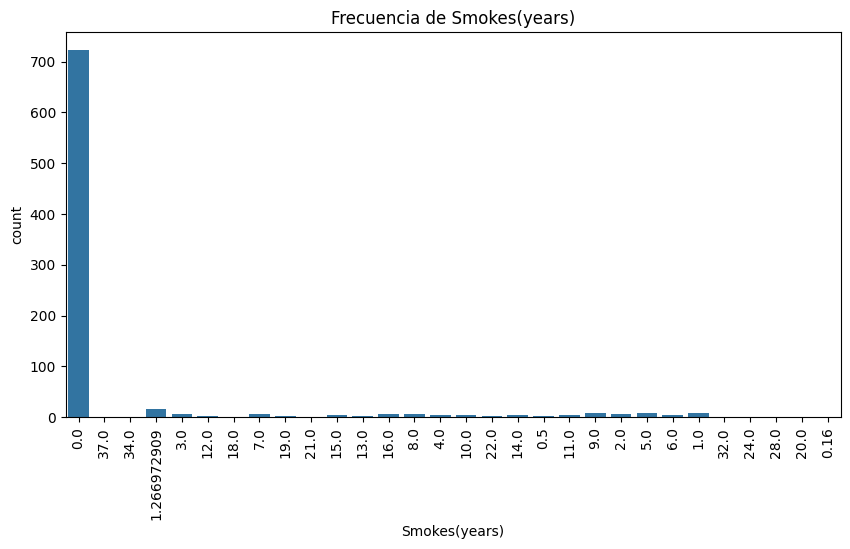

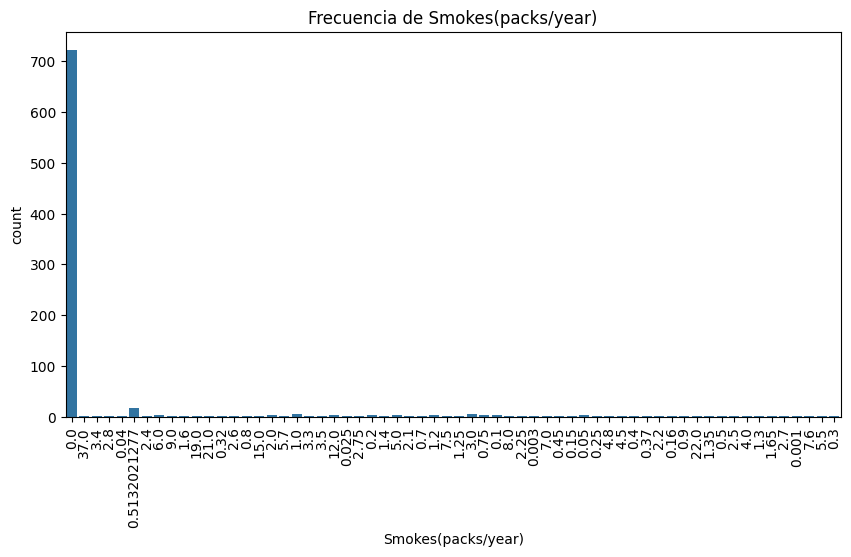

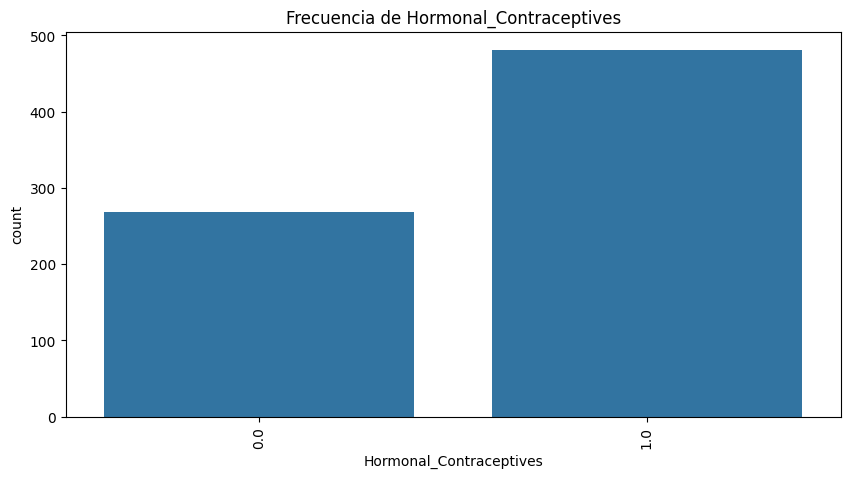

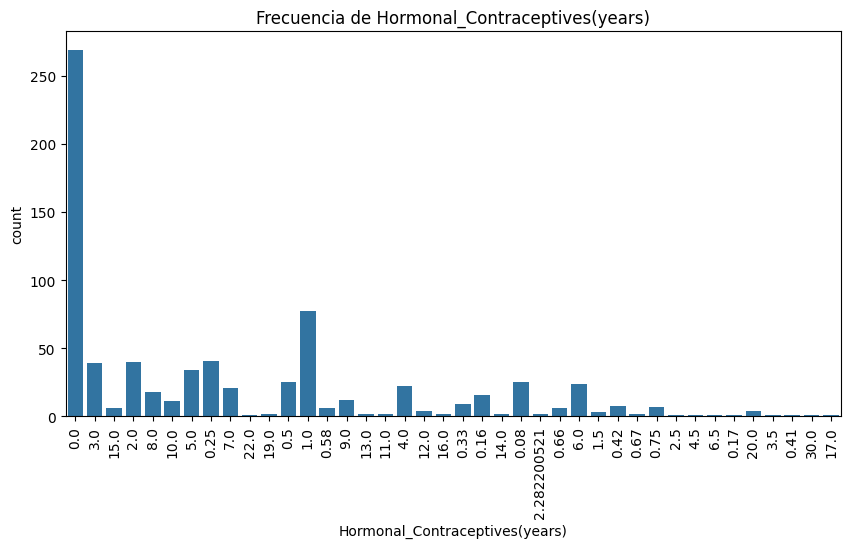

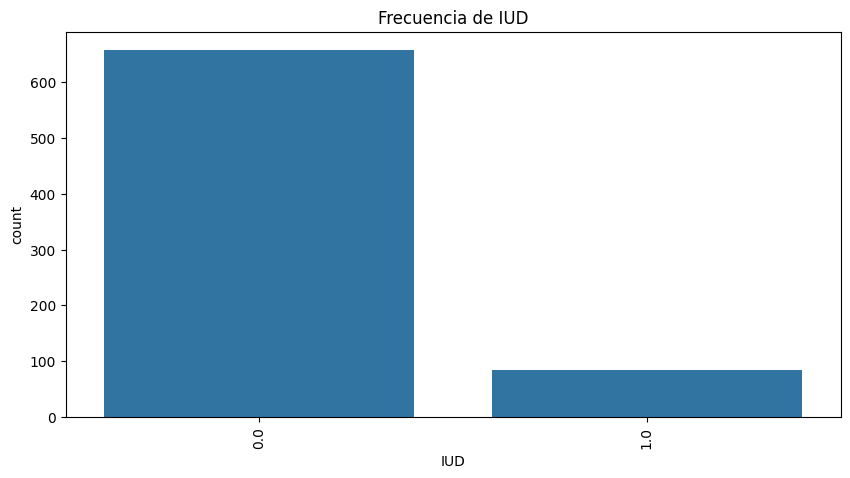

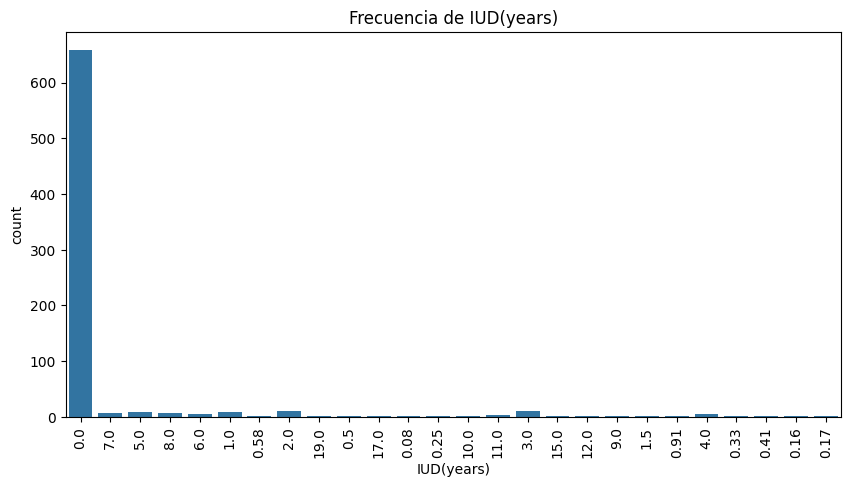

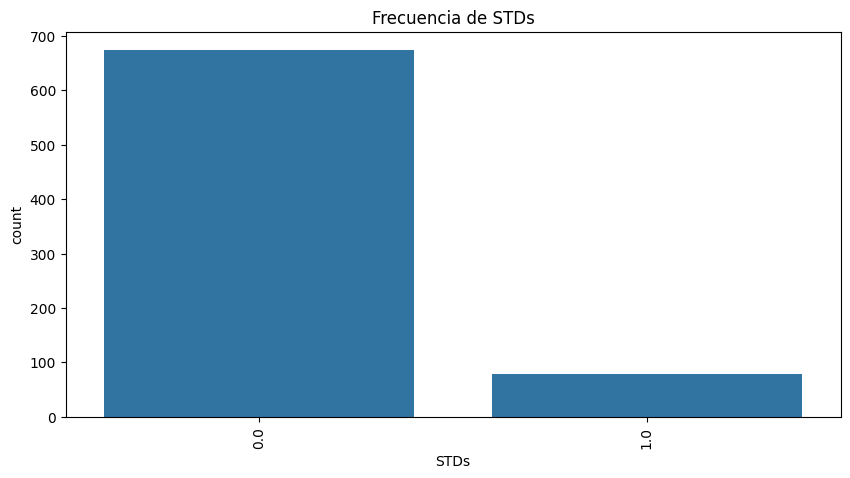

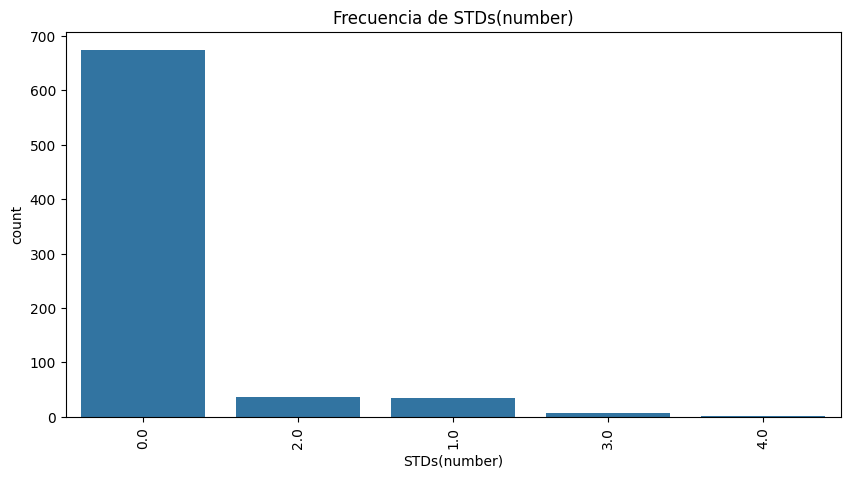

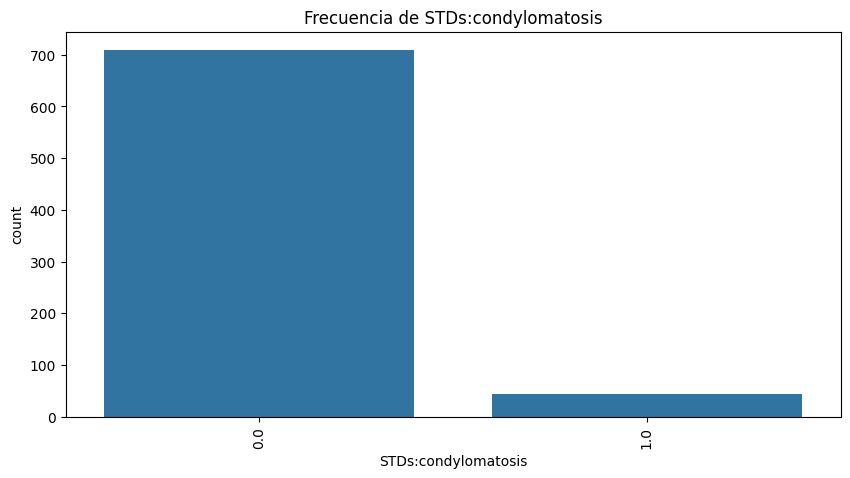

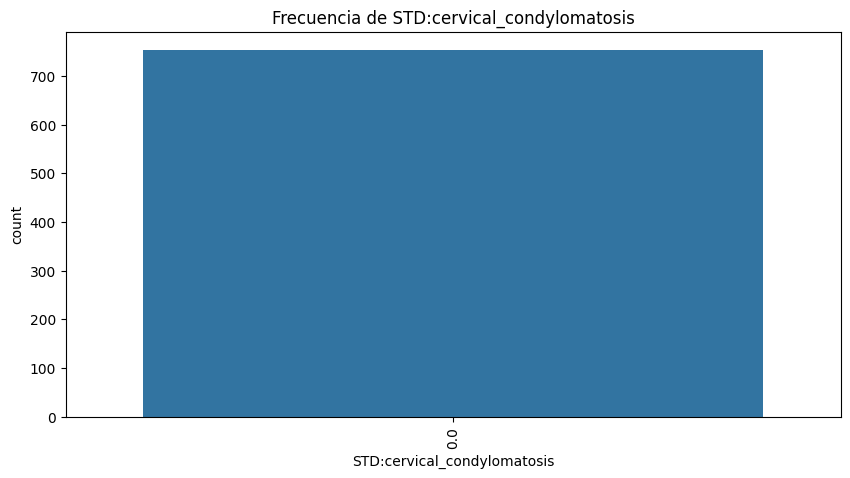

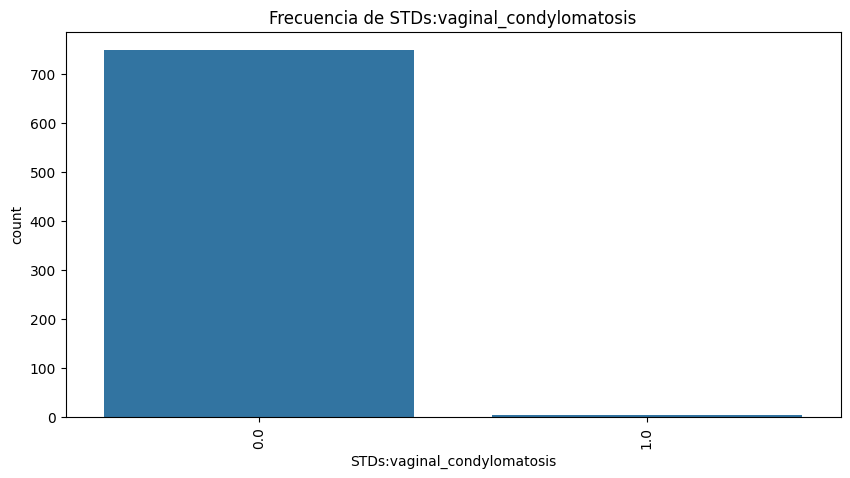

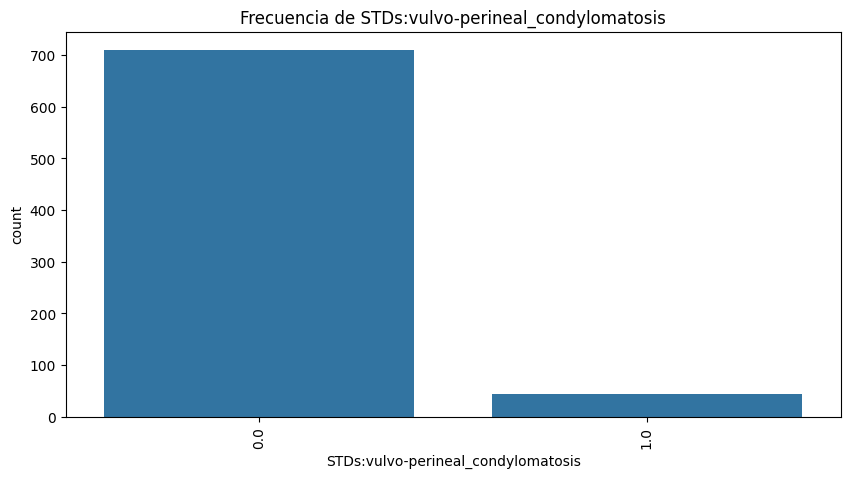

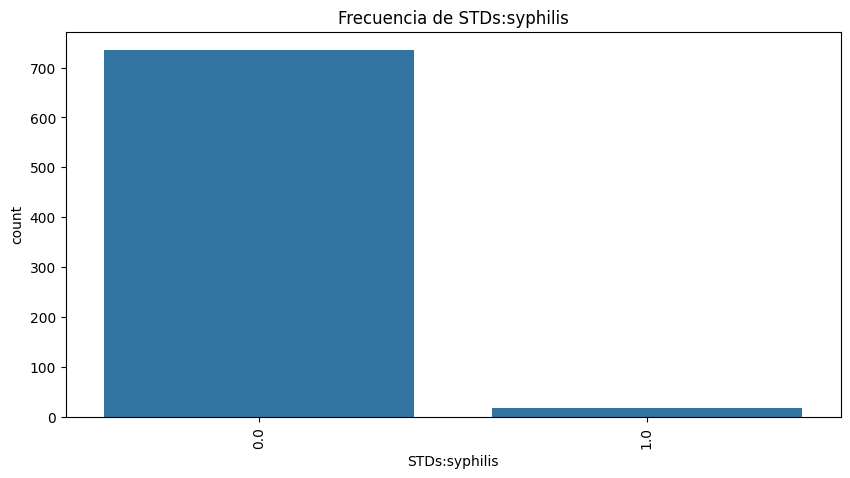

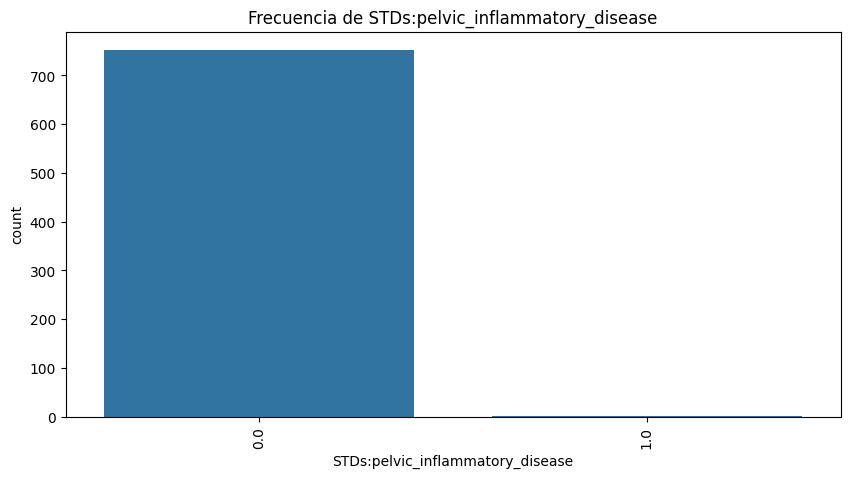

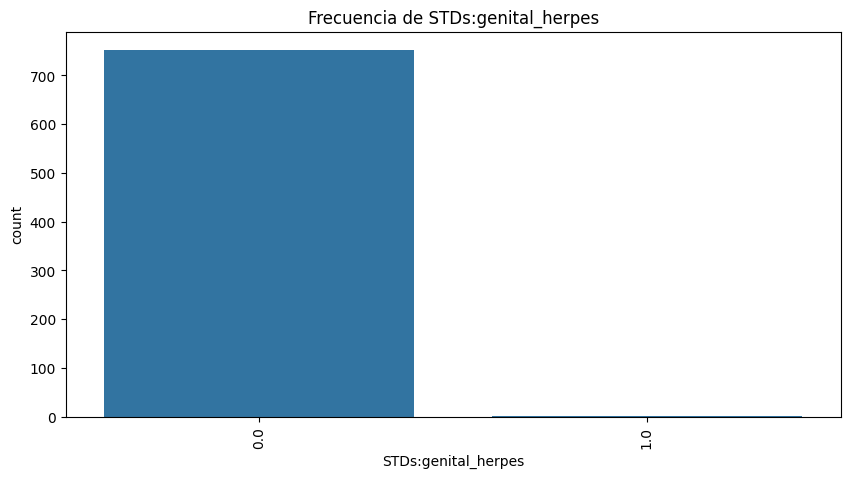

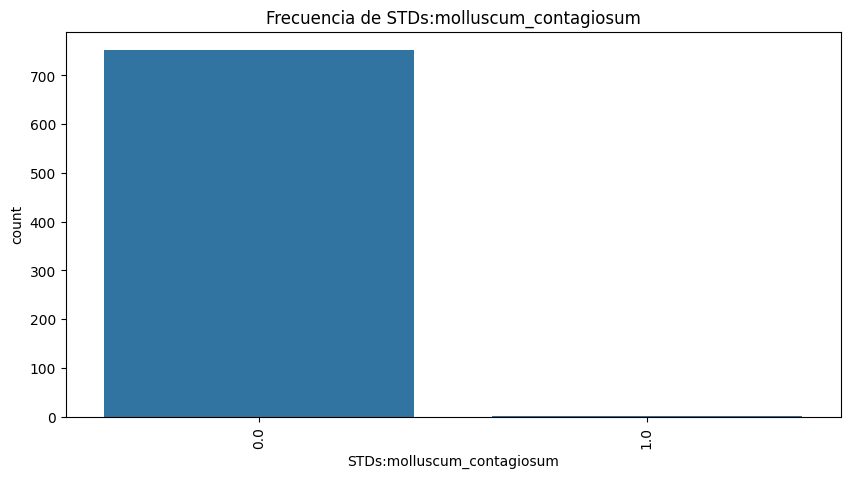

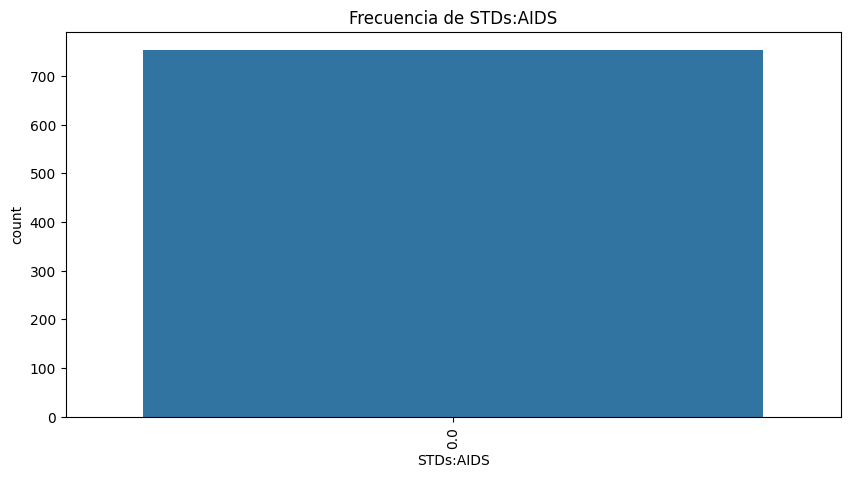

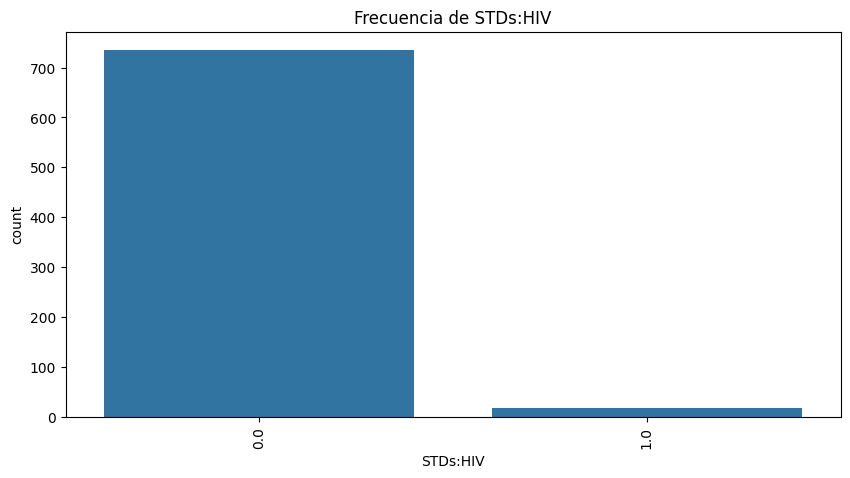

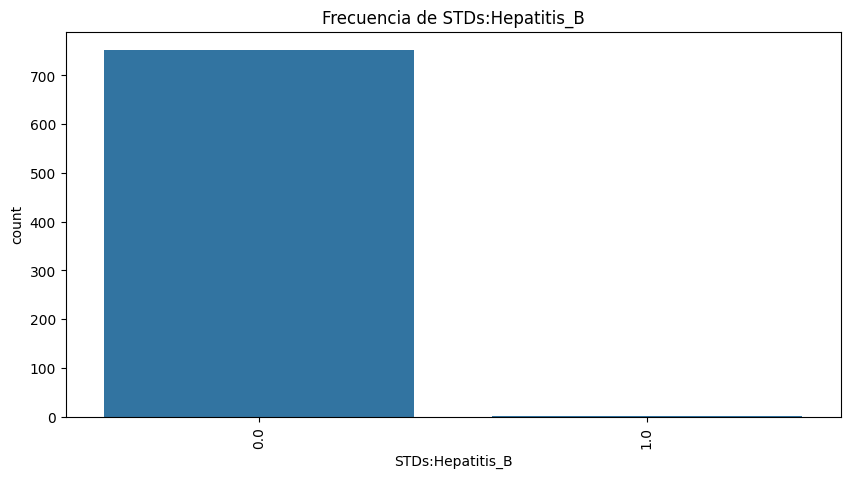

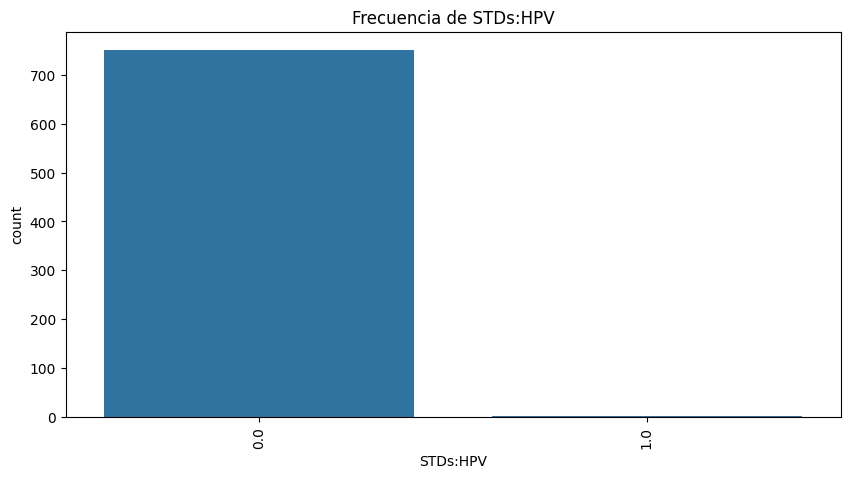

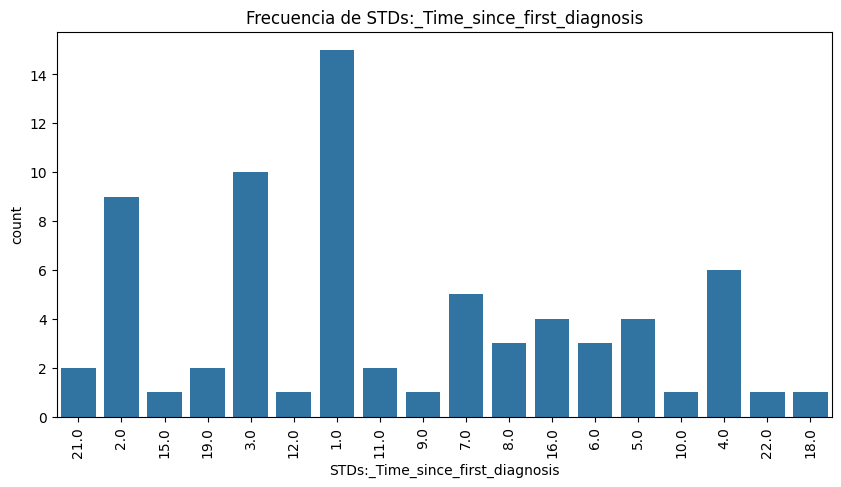

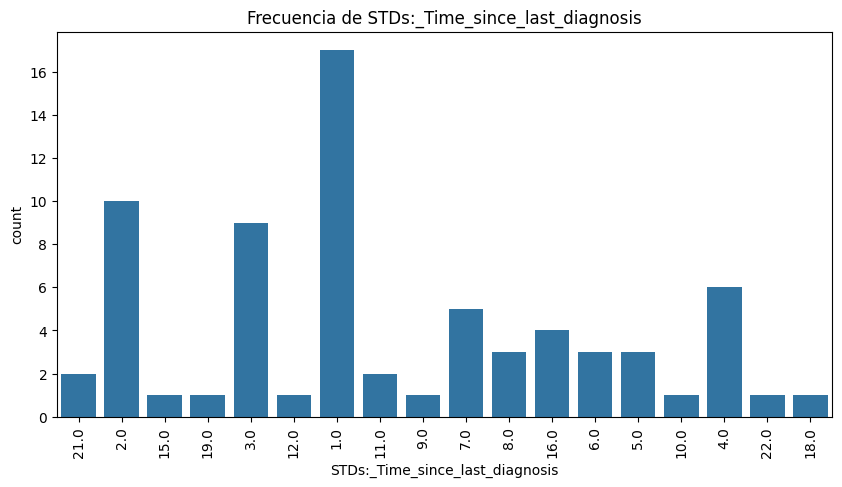

In [85]:
# Tablas de frecuencia y proporción para variables categóricas
for col in cat_vars:
    print(f"Frecuencia de {col}")
    print(df[col].value_counts())
    print(f"Proporción de {col}")
    print(df[col].value_counts() / len(df))
    print("*" * 50)

# Gráficos de barras para variables categóricas
for col in cat_vars:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df[col])
    plt.title(f'Frecuencia de {col}')
    plt.xticks(rotation=90)
    plt.show()


## 6. Manejo de valores faltantes

In [86]:
# Análisis de valores faltantes
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]
print("Valores faltantes por columna:")
print(missing_data)

# Decidir qué hacer con los valores faltantes
# Si el porcentaje de valores faltantes es muy alto, considerar eliminar la variable
threshold = 0.5
df = df.dropna(axis=1, thresh=int(threshold*df.shape[0]))

# Rellenar valores faltantes restantes con la mediana (para numéricas) o la moda (para categóricas)
for col in df.columns:
    if df[col].dtype == 'O':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)


Valores faltantes por columna:
Number_of_sexual_partners              26
First_sexual_intercourse                7
Num_of_pregnancies                     56
Smokes                                 13
Smokes(years)                          13
Smokes(packs/year)                     13
Hormonal_Contraceptives               108
Hormonal_Contraceptives(years)        108
IUD                                   117
IUD(years)                            117
STDs                                  105
STDs(number)                          105
STDs:condylomatosis                   105
STD:cervical_condylomatosis           105
STDs:vaginal_condylomatosis           105
STDs:vulvo-perineal_condylomatosis    105
STDs:syphilis                         105
STDs:pelvic_inflammatory_disease      105
STDs:genital_herpes                   105
STDs:molluscum_contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis_B                      105
STD

## 7. Transformacón de variables categóricas para PCA

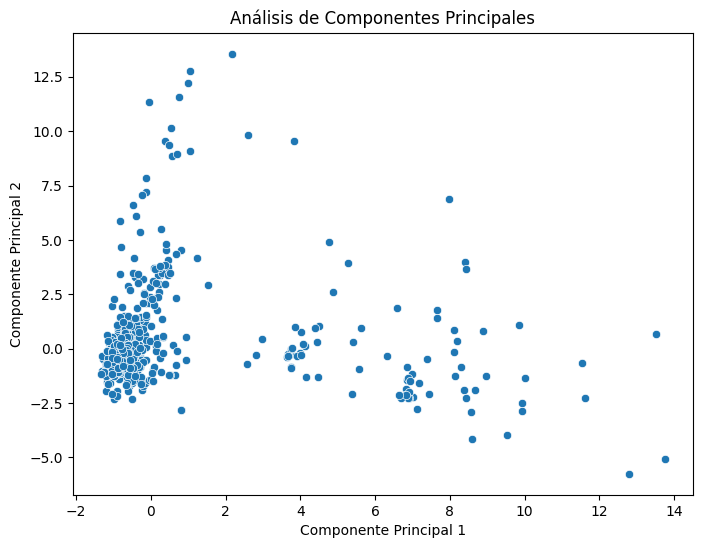

In [87]:
# Convertir variables categóricas a dummies
df_dummies = pd.get_dummies(df, drop_first=True)

# Normalizar los datos numéricos
features = df_dummies.columns
x = StandardScaler().fit_transform(df_dummies)

# PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Visualización de PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=principal_df['PC1'], y=principal_df['PC2'])
plt.title('Análisis de Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()
